In [1]:
#This code is for ta plots seasonal and annual

import xarray as xr
import pandas as pd
import netCDF4 as nc
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import numpy as np
import cftime
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

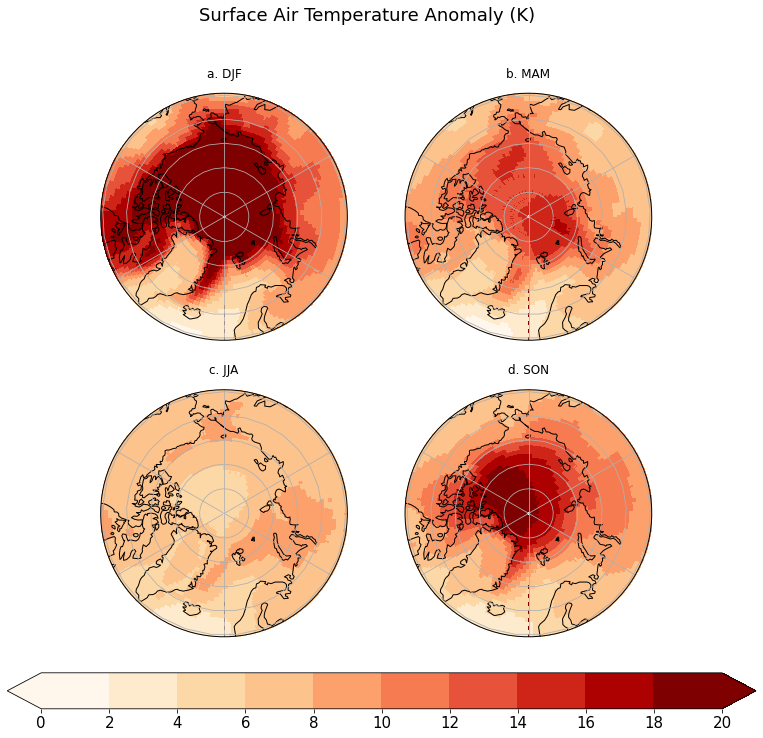

In [31]:
#cell for seasonal values tas

#Load data files with seasonal plots
#Locate Files
Model_mean = r'C:\Users\Asus\Desktop\Masters Project\Data\tas_24_mar\Seasonal MMM\DJF-MMM-Anomaly.nc'
file2 = r'C:\Users\Asus\Desktop\Masters Project\Data\tas_24_mar\Seasonal MMM\MAM-MMM-Anomaly.nc'
file3 = r'C:\Users\Asus\Desktop\Masters Project\Data\tas_24_mar\Seasonal MMM\JJA-MMM-Anomaly.nc'
file4 = r'C:\Users\Asus\Desktop\Masters Project\Data\tas_24_mar\Seasonal MMM\SON-MMM-Anomaly.nc'

#open nc file into xarray dataset
dset_model_mean = xr.open_dataset(Model_mean, decode_times=True, use_cftime=True) 
mean2 = xr.open_dataset(file2, decode_times=True, use_cftime=True) 
mean3 = xr.open_dataset(file3, decode_times=True, use_cftime=True) 
mean4 = xr.open_dataset(file4, decode_times=True, use_cftime=True)

# Create a figure
fig = plt.figure(1, figsize=[10,10])

# Define circle for projection area, this is to draw a circle as a boundary to contain the data
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius+center)

# Create a discrete colourmap with a blue to red colour bar
cmap = mpl.cm.get_cmap('OrRd', 10)


# Use cartopy and plot in LambertAzimuthal specify latitude center
# Different axes are created to contain each plot of data
ax = fig.add_subplot(2, 2, 1, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax2.coastlines()

ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax3.coastlines()

ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax4.coastlines()



# Transform projection to add data onto the plots
# Important to add colorbar = False as the default is to add a vertical colorbar
cs = dset_model_mean['tas'].plot(ax=ax,transform=ccrs.PlateCarree(),vmin = 0, vmax = 20,cmap = cmap,add_colorbar = False)
cs2 = mean2['tas'].plot(ax=ax2,transform=ccrs.PlateCarree(),vmin = 0, vmax = 20,cmap = cmap,add_colorbar = False)
cs3 = mean3['tas'].plot(ax=ax3,transform=ccrs.PlateCarree(),vmin = 0, vmax = 20,cmap = cmap,add_colorbar = False)
cs4 = mean4['tas'].plot(ax=ax4,transform=ccrs.PlateCarree(),vmin = 0, vmax = 20,cmap = cmap,add_colorbar = False)




# Set the gridlines and boundaries for projection, crop away outside points with no data
ax.gridlines()
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())
ax2.gridlines()
ax2.set_boundary(circle, transform=ax2.transAxes)
ax2.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())
ax3.gridlines()
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())
ax4.gridlines()
ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())


# Figure title and individual axes titles
fig.suptitle('Surface Air Temperature Anomaly (K)', fontsize = 18, y = 1 )
ax.set_title('a. DJF',fontsize = 12 , y = 1.04)
ax2.set_title('b. MAM',fontsize = 12 , y = 1.04)
ax3.set_title('c. JJA',fontsize = 12 , y = 1.04)
ax4.set_title('d. SON',fontsize = 12 , y = 1.04)


# Edit colorbar location to be at the bottom
cbar_ax = fig.add_axes([0, 0.025, 1.04, 0.05])
cbar = fig.colorbar(cs, cax=cbar_ax, ticks = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], orientation='horizontal',extend='both')

# Size of colorbar ticks
cbar.ax.tick_params(labelsize=15)

# Save the plot
plt.savefig('C:/Users/Asus/Desktop/Masters Project/Graphs/tas_anomaly_season_OrRd.png', dpi=300, bbox_inches='tight')

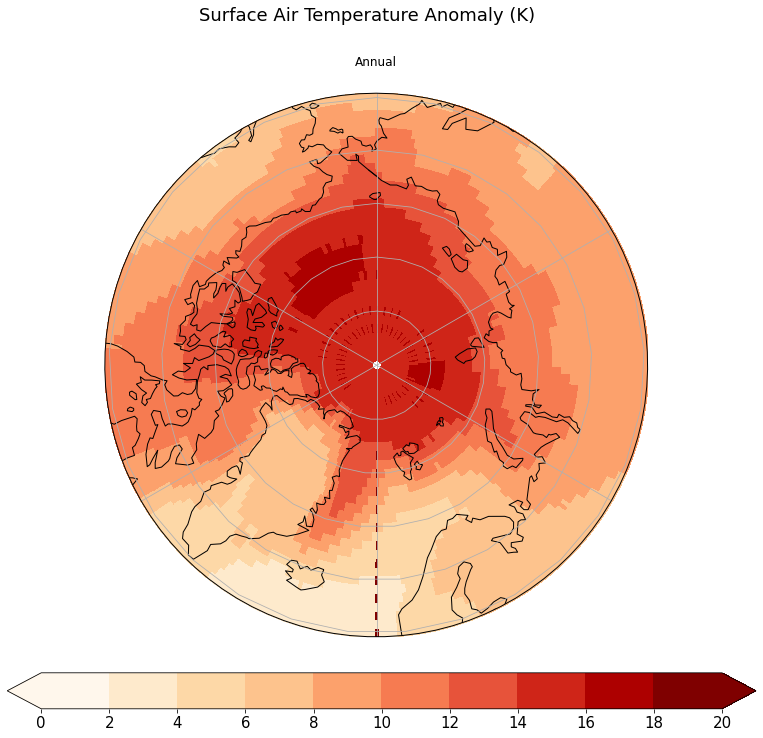

In [32]:
#cell for annual values tas

#Load data files with seasonal plots
#Locate Files
Model_mean = r'C:\Users\Asus\Desktop\Masters Project\Data\tas_24_mar\tas_annual_MMM.nc'

#open nc file into xarray dataset
dset_model_mean = xr.open_dataset(Model_mean, decode_times=True, use_cftime=True) 

# Create a figure
fig = plt.figure(1, figsize=[10,10])

# Define circle for projection area, this is to draw a circle as a boundary to contain the data
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius+center)

# Create a discrete colourmap with a blue to red colour bar
cmap = mpl.cm.get_cmap('OrRd', 10)


# Use cartopy and plot in LambertAzimuthal specify latitude center
# Different axes are created to contain each plot of data
ax = fig.add_subplot(1,1,1,projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()


# Transform projection to add data onto the plots
# Important to add colorbar = False as the default is to add a vertical colorbar
cs = dset_model_mean['tas'].plot(ax=ax,transform=ccrs.PlateCarree(),vmin = 0, vmax = 20,cmap = cmap,add_colorbar = False)

# Set the gridlines and boundaries for projection, crop away outside points with no data
ax.gridlines()
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 90, 59.5], ccrs.PlateCarree())

# Figure title and individual axes titles
fig.suptitle('Surface Air Temperature Anomaly (K)', fontsize = 18, y = 1 )
ax.set_title('Annual',fontsize = 12 , y = 1.04)

# Edit colorbar location to be at the bottom
cbar_ax = fig.add_axes([0, 0.025, 1.04, 0.05])
cbar = fig.colorbar(cs, cax=cbar_ax, ticks = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], orientation='horizontal',extend='both')

# Size of colorbar ticks
cbar.ax.tick_params(labelsize=15)

# Save the plot
plt.savefig('C:/Users/Asus/Desktop/Masters Project/Graphs/tas_anomaly_annual_27-Mar.png', dpi=300, bbox_inches='tight')